In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
from config import api_key

# Define the dataset path
dataset = 'NUFORC/ufo-sightings'
url = f'https://www.kaggle.com/api/v1/datasets/download/{dataset}'

# Set headers for authentication
headers = {
    'Authorization': f'Bearer {api_key}'
}

# Send a GET request to download the dataset
response = requests.get(url, headers=headers, stream=True)

# Check if the request was successful
if response.status_code == 200:
    # Save the dataset to a zip file
    with open('ufo_sightings.zip', 'wb') as file:
        for chunk in response.iter_content(chunk_size=1024):
            file.write(chunk)
    print('Dataset downloaded successfully.')
else:
    print(f'Failed to download dataset: {response.status_code}, {response.text}')
# Unzip the downloaded file
import zipfile

with zipfile.ZipFile('ufo_sightings.zip', 'r') as zip_ref:
    zip_ref.extractall('ufo_sightings')

print('Dataset extracted to ufo_sightings directory.')

Dataset downloaded successfully.
Dataset extracted to ufo_sightings directory.


In [2]:
dtype = {
    5: str,  
    9: str  
}
df = pd.read_csv("ufo_sightings/scrubbed.csv", dtype=dtype)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   datetime              80332 non-null  object 
 1   city                  80332 non-null  object 
 2   state                 74535 non-null  object 
 3   country               70662 non-null  object 
 4   shape                 78400 non-null  object 
 5   duration (seconds)    80332 non-null  object 
 6   duration (hours/min)  80332 non-null  object 
 7   comments              80317 non-null  object 
 8   date posted           80332 non-null  object 
 9   latitude              80332 non-null  object 
 10  longitude             80332 non-null  float64
dtypes: float64(1), object(10)
memory usage: 6.7+ MB


In [3]:
df

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611
...,...,...,...,...,...,...,...,...,...,...,...
80327,9/9/2013 21:15,nashville,tn,us,light,600,10 minutes,Round from the distance/slowly changing colors...,9/30/2013,36.1658333,-86.784444
80328,9/9/2013 22:00,boise,id,us,circle,1200,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,9/30/2013,43.6136111,-116.202500
80329,9/9/2013 22:00,napa,ca,us,other,1200,hour,Napa UFO&#44,9/30/2013,38.2972222,-122.284444
80330,9/9/2013 22:20,vienna,va,us,circle,5,5 seconds,Saw a five gold lit cicular craft moving fastl...,9/30/2013,38.9011111,-77.265556


In [4]:
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')

In [5]:
df['date'] = df['datetime'].dt.date
df['time'] = df['datetime'].dt.time


In [6]:
df

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,date,time
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111,1949-10-10,20:30:00
1,1949-10-10 21:00:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082,1949-10-10,21:00:00
2,1955-10-10 17:00:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667,1955-10-10,17:00:00
3,1956-10-10 21:00:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833,1956-10-10,21:00:00
4,1960-10-10 20:00:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611,1960-10-10,20:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80327,2013-09-09 21:15:00,nashville,tn,us,light,600,10 minutes,Round from the distance/slowly changing colors...,9/30/2013,36.1658333,-86.784444,2013-09-09,21:15:00
80328,2013-09-09 22:00:00,boise,id,us,circle,1200,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,9/30/2013,43.6136111,-116.202500,2013-09-09,22:00:00
80329,2013-09-09 22:00:00,napa,ca,us,other,1200,hour,Napa UFO&#44,9/30/2013,38.2972222,-122.284444,2013-09-09,22:00:00
80330,2013-09-09 22:20:00,vienna,va,us,circle,5,5 seconds,Saw a five gold lit cicular craft moving fastl...,9/30/2013,38.9011111,-77.265556,2013-09-09,22:20:00


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   datetime              79638 non-null  datetime64[ns]
 1   city                  80332 non-null  object        
 2   state                 74535 non-null  object        
 3   country               70662 non-null  object        
 4   shape                 78400 non-null  object        
 5   duration (seconds)    80332 non-null  object        
 6   duration (hours/min)  80332 non-null  object        
 7   comments              80317 non-null  object        
 8   date posted           80332 non-null  object        
 9   latitude              80332 non-null  object        
 10  longitude             80332 non-null  float64       
 11  date                  79638 non-null  object        
 12  time                  79638 non-null  object        
dtypes: datetime64[ns

In [8]:
df.dropna(inplace=True)

In [9]:
df

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,date,time
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111,1949-10-10,20:30:00
3,1956-10-10 21:00:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833,1956-10-10,21:00:00
4,1960-10-10 20:00:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611,1960-10-10,20:00:00
5,1961-10-10 19:00:00,bristol,tn,us,sphere,300,5 minutes,My father is now 89 my brother 52 the girl wit...,4/27/2007,36.5950000,-82.188889,1961-10-10,19:00:00
7,1965-10-10 23:45:00,norwalk,ct,us,disk,1200,20 minutes,A bright orange color changing to reddish colo...,10/2/1999,41.1175000,-73.408333,1965-10-10,23:45:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80327,2013-09-09 21:15:00,nashville,tn,us,light,600,10 minutes,Round from the distance/slowly changing colors...,9/30/2013,36.1658333,-86.784444,2013-09-09,21:15:00
80328,2013-09-09 22:00:00,boise,id,us,circle,1200,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,9/30/2013,43.6136111,-116.202500,2013-09-09,22:00:00
80329,2013-09-09 22:00:00,napa,ca,us,other,1200,hour,Napa UFO&#44,9/30/2013,38.2972222,-122.284444,2013-09-09,22:00:00
80330,2013-09-09 22:20:00,vienna,va,us,circle,5,5 seconds,Saw a five gold lit cicular craft moving fastl...,9/30/2013,38.9011111,-77.265556,2013-09-09,22:20:00


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66040 entries, 0 to 80331
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   datetime              66040 non-null  datetime64[ns]
 1   city                  66040 non-null  object        
 2   state                 66040 non-null  object        
 3   country               66040 non-null  object        
 4   shape                 66040 non-null  object        
 5   duration (seconds)    66040 non-null  object        
 6   duration (hours/min)  66040 non-null  object        
 7   comments              66040 non-null  object        
 8   date posted           66040 non-null  object        
 9   latitude              66040 non-null  object        
 10  longitude             66040 non-null  float64       
 11  date                  66040 non-null  object        
 12  time                  66040 non-null  object        
dtypes: datetime64[ns](1),

In [11]:
df.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,date,time
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111,1949-10-10,20:30:00
3,1956-10-10 21:00:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833,1956-10-10,21:00:00
4,1960-10-10 20:00:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611,1960-10-10,20:00:00
5,1961-10-10 19:00:00,bristol,tn,us,sphere,300,5 minutes,My father is now 89 my brother 52 the girl wit...,4/27/2007,36.5950000,-82.188889,1961-10-10,19:00:00
7,1965-10-10 23:45:00,norwalk,ct,us,disk,1200,20 minutes,A bright orange color changing to reddish colo...,10/2/1999,41.1175000,-73.408333,1965-10-10,23:45:00


In [12]:
df['datetime'].dt.year.value_counts().sort_index()

datetime
1910       1
1920       1
1925       1
1929       1
1931       2
        ... 
2010    3626
2011    4430
2012    6450
2013    6202
2014    1969
Name: count, Length: 83, dtype: int64

<Axes: xlabel='datetime'>

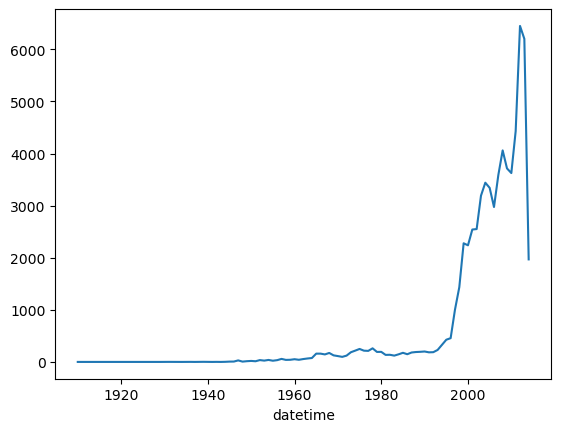

In [13]:
df['datetime'].dt.year.value_counts().sort_index().plot()

<Axes: xlabel='datetime'>

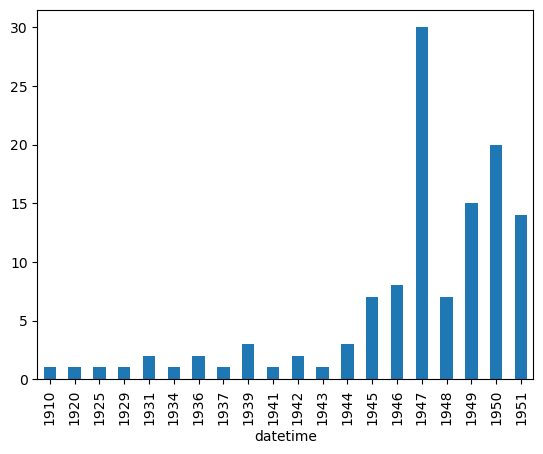

In [14]:
# Compare the trend of UFO sightings over the years
df['datetime'].dt.year.value_counts().sort_index().head(20).plot(kind='bar')

<Axes: xlabel='datetime'>

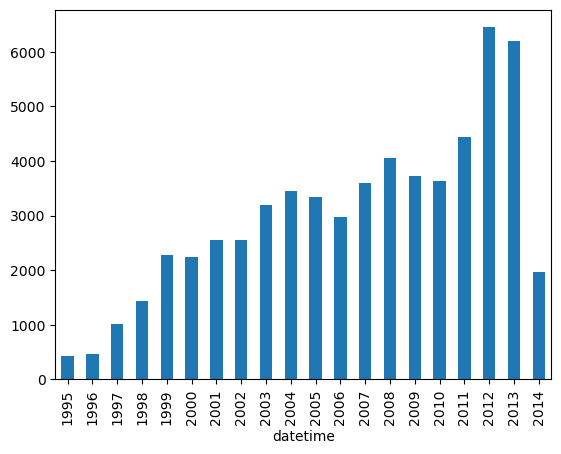

In [15]:
df['datetime'].dt.year.value_counts().sort_index().tail(20).plot(kind='bar')

In [16]:
df['year'] = df['datetime'].dt.year
df.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,date,time,year
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111,1949-10-10,20:30:00,1949
3,1956-10-10 21:00:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833,1956-10-10,21:00:00,1956
4,1960-10-10 20:00:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611,1960-10-10,20:00:00,1960
5,1961-10-10 19:00:00,bristol,tn,us,sphere,300,5 minutes,My father is now 89 my brother 52 the girl wit...,4/27/2007,36.5950000,-82.188889,1961-10-10,19:00:00,1961
7,1965-10-10 23:45:00,norwalk,ct,us,disk,1200,20 minutes,A bright orange color changing to reddish colo...,10/2/1999,41.1175000,-73.408333,1965-10-10,23:45:00,1965


In [17]:
df.groupby(['country', 'year']).count()


datetime  city  state  shape  duration (seconds)  \
country year                                                     
au      1996         1     1      1      1                   1   
        2000         1     1      1      1                   1   
        2002         2     2      2      2                   2   
        2005         1     1      1      1                   1   
        2006         1     1      1      1                   1   
...                ...   ...    ...    ...                 ...   
us      2010      3488  3488   3488   3488                3488   
        2011      4306  4306   4306   4306                4306   
        2012      6216  6216   6216   6216                6216   
        2013      5961  5961   5961   5961                5961   
        2014      1927  1927   1927   1927                1927   

              duration (hours/min)  comments  date posted  latitude  \
country year                                                          
au      1996                     1         1            1         1   
        2000                     1         1            1         1   
        2002                     2         2            2         2   
        2005                     1         1            1         1   
        2006                     1         1            1         1   
...                            ...       ...          ...       ...   
us      2010                  3488      3488         3488      3488   
        2011                  4306      4306         4306      4306   
        2012                  6216      6216         6216      6216   
        2013                  5961      5961         5961      5961   
        2014                  1927      1927         1927      1927   

              longitude   date  time  
country year                          
au      1996           1     1     1  
        2000           1     1     1  
        2002           2     2     2  
        2005           1     1     1  
        2006           1     1     1  
...                  ...   ...   ...  
us      2010        3488  3488  3488  
        2011        4306  4306  4306  
        2012        6216  6216  6216  
        2013        5961  5961  5961  
        2014        1927  1927  1927  

[162 rows x 12 columns]

In [18]:
df.groupby(['country', 'year']).size()
country_year_counts = df.groupby(['country', 'year']).size().reset_index(name='counts')
country_year_counts

,country,year,counts
0,au,1996,1
1,au,2000,1
2,au,2002,2
3,au,2005,1
4,au,2006,1
...,...,...,...
157,us,2010,3488
158,us,2011,4306
159,us,2012,6216
160,us,2013,5961


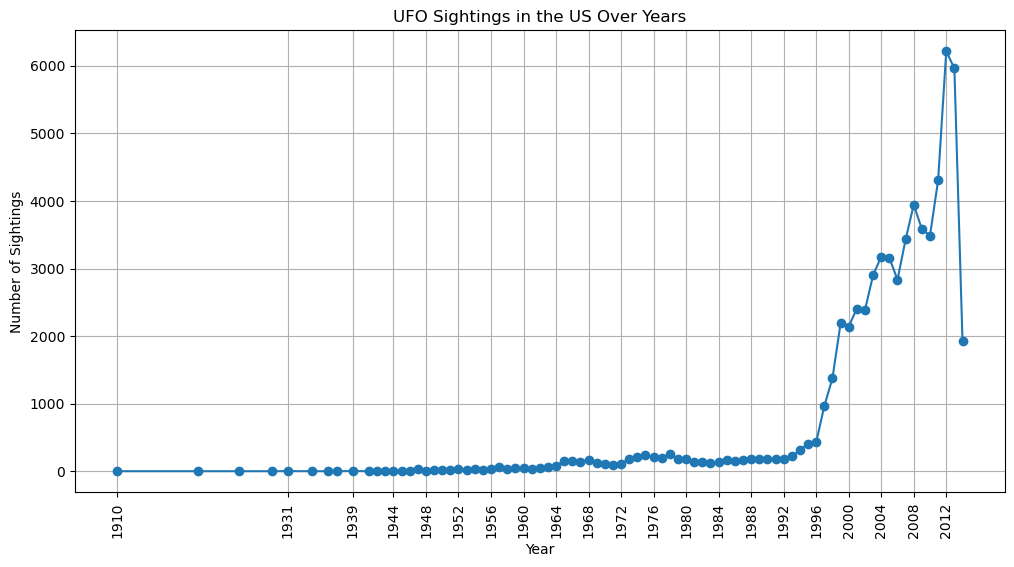

In [58]:
us_data = country_year_counts[country_year_counts['country'] == 'us']

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(us_data['year'], us_data['counts'], marker='o')
plt.title('UFO Sightings in the US Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Sightings')
plt.xticks(us_data['year'][::4], rotation=90)
plt.grid()
plt.show()

In [60]:
df['country'].unique()

array(['us', 'ca', 'au', 'gb'], dtype=object)

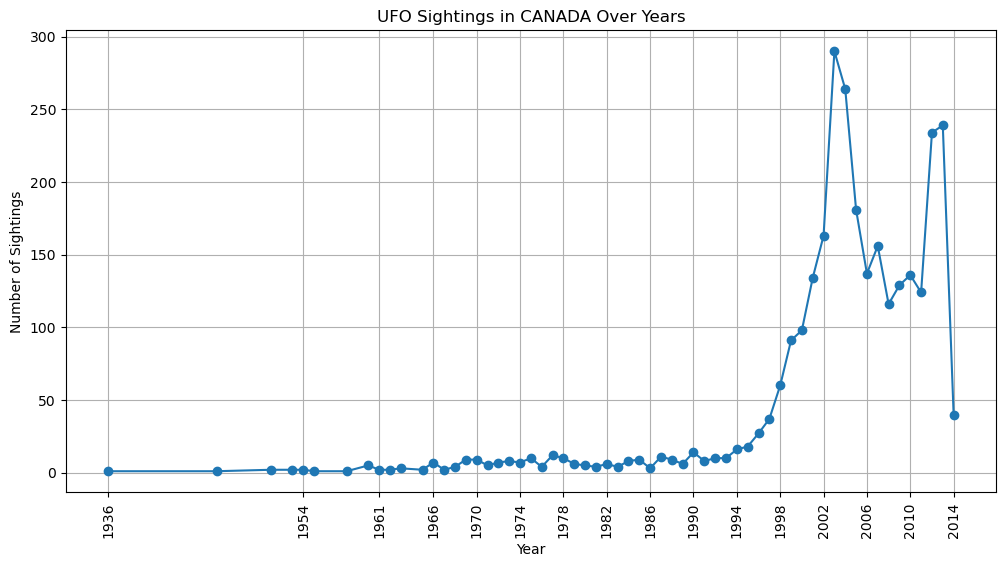

In [62]:
#CANADA
ca_data = country_year_counts[country_year_counts['country'] == 'ca']

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(ca_data['year'], ca_data['counts'], marker='o')
plt.title('UFO Sightings in CANADA Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Sightings')
plt.xticks(ca_data['year'][::4], rotation=90)
plt.grid()
plt.show()

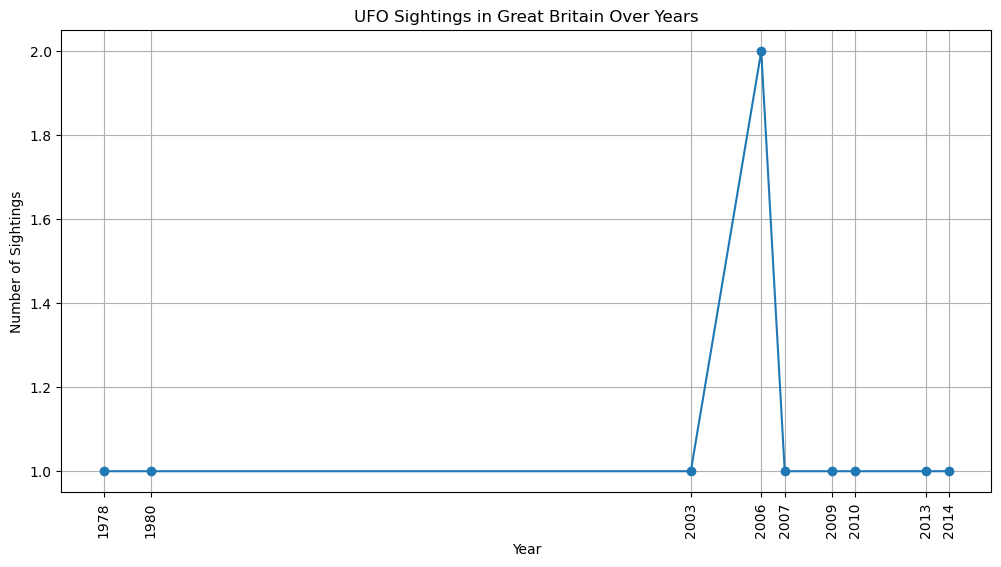

In [64]:
#Great Britain
gb_data = country_year_counts[country_year_counts['country'] == 'gb']

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(gb_data['year'], gb_data['counts'], marker='o')
plt.title('UFO Sightings in Great Britain Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Sightings')
plt.xticks(gb_data['year'], rotation=90)
plt.grid()
plt.show()

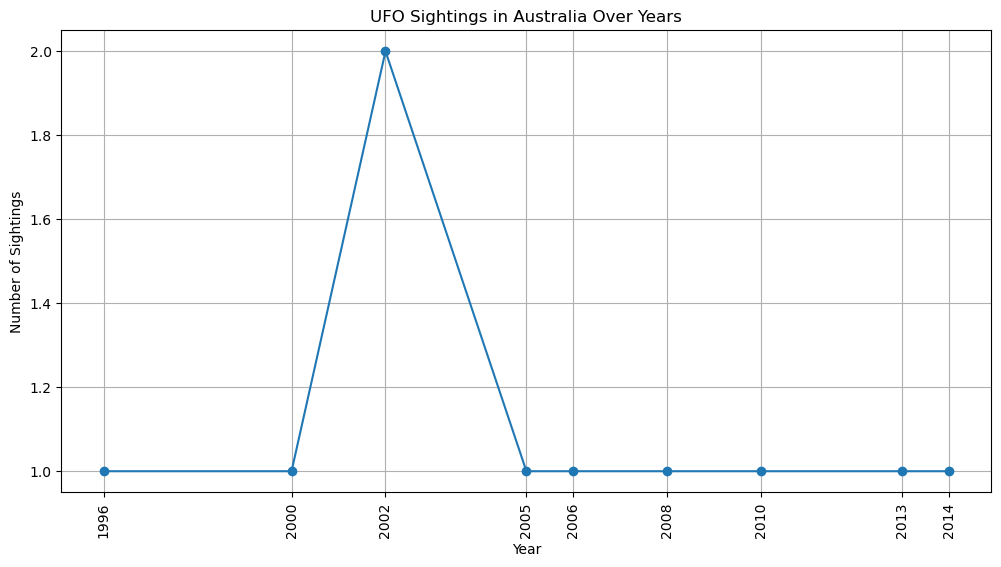

In [66]:
#Australia
au_data = country_year_counts[country_year_counts['country'] == 'au']

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(au_data['year'], au_data['counts'], marker='o')
plt.title('UFO Sightings in Australia Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Sightings')
plt.xticks(au_data['year'], rotation=90)
plt.grid()
plt.show()

In [68]:
country_year_counts['country'].value_counts()

country
us    83
ca    61
au     9
gb     9
Name: count, dtype: int64

In [70]:
country = country_year_counts.groupby('country')['year'].sum().sort_values(ascending=False)
country

country
us    163696
ca    120974
au     18054
gb     18020
Name: year, dtype: int32

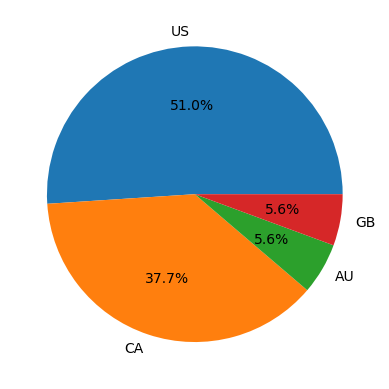

In [72]:
plt.pie(country, labels=country.index.str.upper(), autopct="%1.1f%%")
plt.show()

In [74]:
# US sightings for linear regression
from scipy.stats import linregress
us_data

,country,year,counts
79,us,1910,1
80,us,1920,1
81,us,1925,1
82,us,1929,1
83,us,1931,2
...,...,...,...
157,us,2010,3488
158,us,2011,4306
159,us,2012,6216
160,us,2013,5961


The r-squared is: 0.47089345433191243, pvalue is : 8.085289290550622e-13


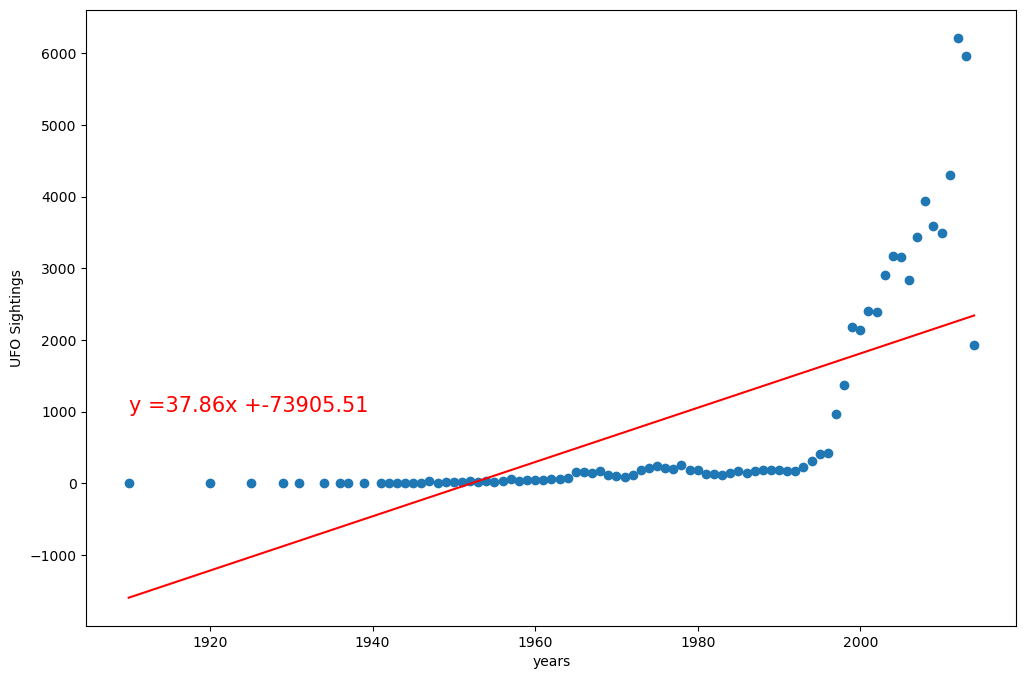

In [76]:
plt.figure(figsize=(12,8))
x_values = us_data['year']
y_values = us_data['counts']

(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq= "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, 'r-')
plt.annotate(line_eq, (1910,1000), fontsize=15, color='red')

plt.xlabel('years')
plt.ylabel('UFO Sightings')

print(f"The r-squared is: {rvalue**2}, pvalue is : {pvalue}")

plt.show()

**SUMMARY**

**R-Squared Value:**
- This value indicates that 47.09% of the variability in UFO sightings can be explained by the year variable in our model
- Since the value of r^2 is not a perfect 1, we can say that value of 0.47 suggests a moderate correlation between year and UFO sightings

**pvalue:**
- The p-value is much lesser than 0.05.
- This suggests strong evidence against null hypothesis.
- We can infer that the relationship between year and UFO sightings is significant.

**Linear Regression Equation:**
- The positive slope indicates that the UFO sightings have increased over the years
- This could suggest that there is a growing interest among public on this topic, better reporting options for public in recent years, or actual increase in the UFO sightings
- The presence of scatter points around the line plot indicate that many factors can impact the outcomes which are not included in our dataset.
  


In [79]:
df.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,date,time,year
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111,1949-10-10,20:30:00,1949
3,1956-10-10 21:00:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833,1956-10-10,21:00:00,1956
4,1960-10-10 20:00:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611,1960-10-10,20:00:00,1960
5,1961-10-10 19:00:00,bristol,tn,us,sphere,300,5 minutes,My father is now 89 my brother 52 the girl wit...,4/27/2007,36.5950000,-82.188889,1961-10-10,19:00:00,1961
7,1965-10-10 23:45:00,norwalk,ct,us,disk,1200,20 minutes,A bright orange color changing to reddish colo...,10/2/1999,41.1175000,-73.408333,1965-10-10,23:45:00,1965


In [81]:
df['shape'].unique()

array(['cylinder', 'circle', 'light', 'sphere', 'disk', 'fireball',
       'unknown', 'oval', 'other', 'rectangle', 'chevron', 'formation',
       'triangle', 'cigar', 'delta', 'changing', 'egg', 'diamond',
       'flash', 'teardrop', 'cone', 'cross', 'pyramid', 'round', 'flare',
       'hexagon', 'crescent', 'changed'], dtype=object)

In [83]:
df['shape'] = df['shape'].str.lower().str.strip()

In [85]:
#Define mapping for shapes
shape_mapping = {
    'disk': 'disc',
    'circle': 'disc',
    'oval': 'disc',
    'round': 'disc',
    'fireball': 'light',
    'changing': 'other',
    'changed': 'other',
    'unknown': 'other',
    'light': 'light',
}
# Replace the values based on the mapping
df['shape'] = df['shape'].replace(shape_mapping)

In [87]:
df['shape'].unique()

array(['cylinder', 'disc', 'light', 'sphere', 'other', 'rectangle',
       'chevron', 'formation', 'triangle', 'cigar', 'delta', 'egg',
       'diamond', 'flash', 'teardrop', 'cone', 'cross', 'pyramid',
       'flare', 'hexagon', 'crescent'], dtype=object)

In [89]:
df.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,date,time,year
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111,1949-10-10,20:30:00,1949
3,1956-10-10 21:00:00,edna,tx,us,disc,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833,1956-10-10,21:00:00,1956
4,1960-10-10 20:00:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611,1960-10-10,20:00:00,1960
5,1961-10-10 19:00:00,bristol,tn,us,sphere,300,5 minutes,My father is now 89 my brother 52 the girl wit...,4/27/2007,36.5950000,-82.188889,1961-10-10,19:00:00,1961
7,1965-10-10 23:45:00,norwalk,ct,us,disc,1200,20 minutes,A bright orange color changing to reddish colo...,10/2/1999,41.1175000,-73.408333,1965-10-10,23:45:00,1965


In [91]:
df['shape'].value_counts()

shape
light        19398
disc         13760
other        11028
triangle      6779
sphere        4516
formation     2074
cigar         1701
flash         1122
rectangle     1109
cylinder      1066
diamond        960
chevron        849
teardrop       612
egg            605
cone           256
cross          194
delta            7
pyramid          1
flare            1
hexagon          1
crescent         1
Name: count, dtype: int64

In [93]:
df['shape'].count()

66040

In [95]:
df.groupby('state')['shape'].value_counts()

state  shape   
ab     light       67
       other       57
       disc        47
       triangle    30
       sphere      20
                   ..
yt     light        2
       other        2
       disc         1
       sphere       1
       triangle     1
Name: count, Length: 953, dtype: int64

In [98]:
df.groupby('country')['shape'].value_counts()

country  shape    
au       disc             3
         light            3
         chevron          1
         diamond          1
         other            1
         rectangle        1
ca       light          865
         disc           600
         other          512
         triangle       266
         sphere         205
         formation       95
         cigar           74
         flash           61
         cylinder        52
         rectangle       46
         diamond         39
         chevron         36
         egg             28
         teardrop        22
         cone            10
         cross            9
         delta            1
gb       disc             4
         light            3
         triangle         2
         sphere           1
us       light        18527
         disc         13153
         other        10515
         triangle      6511
         sphere        4310
         formation     1979
         cigar         1627
         rectangle     1062
 

In [106]:
shape_df = df.groupby('country')['shape'].value_counts()
shape_df

country  shape    
au       disc             3
         light            3
         chevron          1
         diamond          1
         other            1
         rectangle        1
ca       light          865
         disc           600
         other          512
         triangle       266
         sphere         205
         formation       95
         cigar           74
         flash           61
         cylinder        52
         rectangle       46
         diamond         39
         chevron         36
         egg             28
         teardrop        22
         cone            10
         cross            9
         delta            1
gb       disc             4
         light            3
         triangle         2
         sphere           1
us       light        18527
         disc         13153
         other        10515
         triangle      6511
         sphere        4310
         formation     1979
         cigar         1627
         rectangle     1062
 

In [114]:
df.groupby('shape')['country'].value_counts()

shape      country
chevron    us           812
           ca            36
           au             1
cigar      us          1627
           ca            74
cone       us           246
           ca            10
crescent   us             1
cross      us           185
           ca             9
cylinder   us          1014
           ca            52
delta      us             6
           ca             1
diamond    us           920
           ca            39
           au             1
disc       us         13153
           ca           600
           gb             4
           au             3
egg        us           577
           ca            28
flare      us             1
flash      us          1061
           ca            61
formation  us          1979
           ca            95
hexagon    us             1
light      us         18527
           ca           865
           au             3
           gb             3
other      us         10515
           ca           512
 

In [130]:
df1 = df[['shape','country']].value_counts()
df1

shape      country
light      us         18527
disc       us         13153
other      us         10515
triangle   us          6511
sphere     us          4310
formation  us          1979
cigar      us          1627
rectangle  us          1062
flash      us          1061
cylinder   us          1014
diamond    us           920
light      ca           865
chevron    us           812
disc       ca           600
teardrop   us           590
egg        us           577
other      ca           512
triangle   ca           266
cone       us           246
sphere     ca           205
cross      us           185
formation  ca            95
cigar      ca            74
flash      ca            61
cylinder   ca            52
rectangle  ca            46
diamond    ca            39
chevron    ca            36
egg        ca            28
teardrop   ca            22
cone       ca            10
cross      ca             9
delta      us             6
disc       gb             4
light      au             3
d

In [148]:
df2 = df1.reset_index()
df2

,shape,country,count
0,light,us,18527
1,disc,us,13153
2,other,us,10515
3,triangle,us,6511
4,sphere,us,4310
5,formation,us,1979
6,cigar,us,1627
7,rectangle,us,1062
8,flash,us,1061
9,cylinder,us,1014


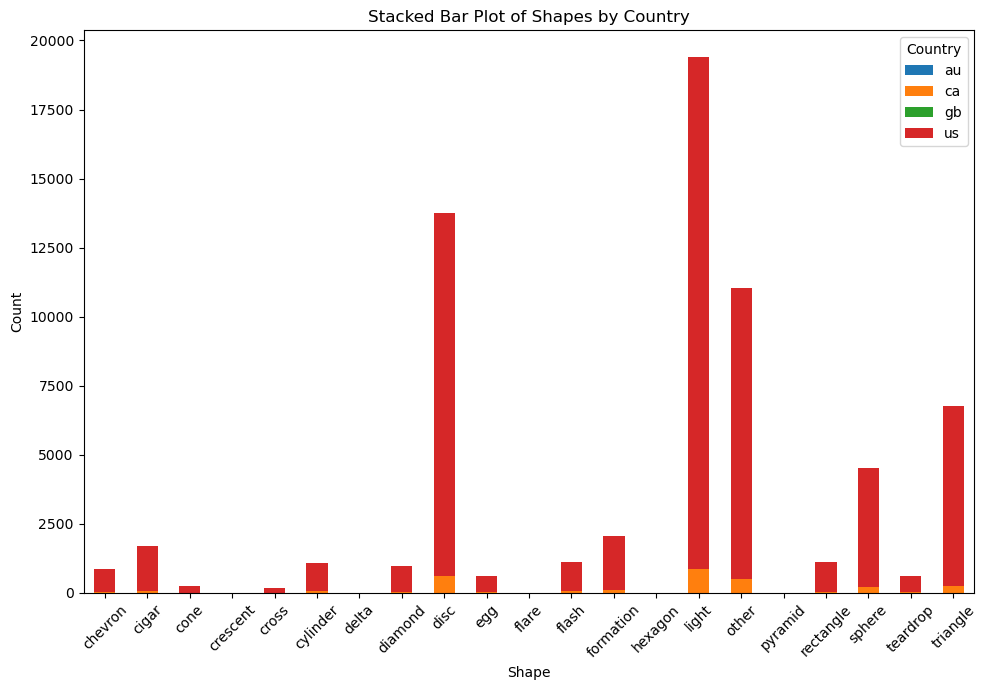

In [150]:
pivot_df = df2.pivot_table(index='shape', columns='country', values='count', fill_value=0)

# Plotting the stacked bar plot
pivot_df.plot(kind='bar', stacked=True, figsize=(10, 7))

# Adding labels and title
plt.title('Stacked Bar Plot of Shapes by Country')
plt.xlabel('Shape')
plt.ylabel('Count')
plt.legend(title='Country')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

In [186]:
UFOShape_df = df.groupby('shape')['country'].value_counts()
UFOShape_df

shape      country
chevron    us           812
           ca            36
           au             1
cigar      us          1627
           ca            74
cone       us           246
           ca            10
crescent   us             1
cross      us           185
           ca             9
cylinder   us          1014
           ca            52
delta      us             6
           ca             1
diamond    us           920
           ca            39
           au             1
disc       us         13153
           ca           600
           gb             4
           au             3
egg        us           577
           ca            28
flare      us             1
flash      us          1061
           ca            61
formation  us          1979
           ca            95
hexagon    us             1
light      us         18527
           ca           865
           au             3
           gb             3
other      us         10515
           ca           512
 

In [200]:
UFOShape_unstacked= UFOShape_df.unstack()
UFOShape_unstacked.columns = UFOShape_unstacked.columns.str.upper()
UFOShape_unstacked

country,AU,CA,GB,US
shape,,,,
chevron,1.0,36.0,NaN,812.0
cigar,NaN,74.0,NaN,1627.0
cone,NaN,10.0,NaN,246.0
crescent,NaN,NaN,NaN,1.0
cross,NaN,9.0,NaN,185.0
cylinder,NaN,52.0,NaN,1014.0
delta,NaN,1.0,NaN,6.0
diamond,1.0,39.0,NaN,920.0
disc,3.0,600.0,4.0,13153.0


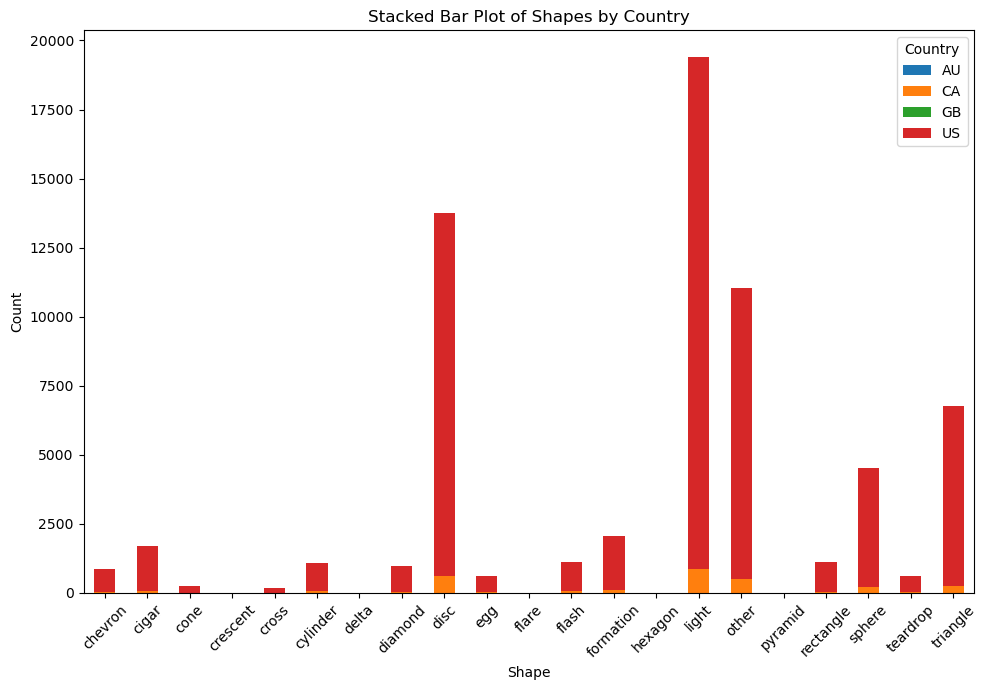

In [202]:
# Plotting the stacked bar plot
UFOShape_unstacked.plot(kind='bar', stacked=True, figsize=(10, 7))

# Adding labels and title
plt.title('Stacked Bar Plot of Shapes by Country')
plt.xlabel('Shape')
plt.ylabel('Count')
plt.legend(title='Country')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


In [204]:
df

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,date,time,year
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111,1949-10-10,20:30:00,1949
3,1956-10-10 21:00:00,edna,tx,us,disc,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833,1956-10-10,21:00:00,1956
4,1960-10-10 20:00:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611,1960-10-10,20:00:00,1960
5,1961-10-10 19:00:00,bristol,tn,us,sphere,300,5 minutes,My father is now 89 my brother 52 the girl wit...,4/27/2007,36.5950000,-82.188889,1961-10-10,19:00:00,1961
7,1965-10-10 23:45:00,norwalk,ct,us,disc,1200,20 minutes,A bright orange color changing to reddish colo...,10/2/1999,41.1175000,-73.408333,1965-10-10,23:45:00,1965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80327,2013-09-09 21:15:00,nashville,tn,us,light,600,10 minutes,Round from the distance/slowly changing colors...,9/30/2013,36.1658333,-86.784444,2013-09-09,21:15:00,2013
80328,2013-09-09 22:00:00,boise,id,us,disc,1200,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,9/30/2013,43.6136111,-116.202500,2013-09-09,22:00:00,2013
80329,2013-09-09 22:00:00,napa,ca,us,other,1200,hour,Napa UFO&#44,9/30/2013,38.2972222,-122.284444,2013-09-09,22:00:00,2013
80330,2013-09-09 22:20:00,vienna,va,us,disc,5,5 seconds,Saw a five gold lit cicular craft moving fastl...,9/30/2013,38.9011111,-77.265556,2013-09-09,22:20:00,2013


In [208]:
filtered_US_df = df[df['country'] == 'us']
filtered_US_df

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,date,time,year
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111,1949-10-10,20:30:00,1949
3,1956-10-10 21:00:00,edna,tx,us,disc,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833,1956-10-10,21:00:00,1956
4,1960-10-10 20:00:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611,1960-10-10,20:00:00,1960
5,1961-10-10 19:00:00,bristol,tn,us,sphere,300,5 minutes,My father is now 89 my brother 52 the girl wit...,4/27/2007,36.5950000,-82.188889,1961-10-10,19:00:00,1961
7,1965-10-10 23:45:00,norwalk,ct,us,disc,1200,20 minutes,A bright orange color changing to reddish colo...,10/2/1999,41.1175000,-73.408333,1965-10-10,23:45:00,1965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80327,2013-09-09 21:15:00,nashville,tn,us,light,600,10 minutes,Round from the distance/slowly changing colors...,9/30/2013,36.1658333,-86.784444,2013-09-09,21:15:00,2013
80328,2013-09-09 22:00:00,boise,id,us,disc,1200,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,9/30/2013,43.6136111,-116.202500,2013-09-09,22:00:00,2013
80329,2013-09-09 22:00:00,napa,ca,us,other,1200,hour,Napa UFO&#44,9/30/2013,38.2972222,-122.284444,2013-09-09,22:00:00,2013
80330,2013-09-09 22:20:00,vienna,va,us,disc,5,5 seconds,Saw a five gold lit cicular craft moving fastl...,9/30/2013,38.9011111,-77.265556,2013-09-09,22:20:00,2013
